In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [479]:
df = pd.read_csv('data.csv')

In [480]:
df.head()

,name,album,artist,release_date,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Purple Haze,Are You Experienced,Jimi Hendrix,1967-05-12,69,0wJoRiX5K5BxlqZTolB2LD,0.533,0.905,2,-5.270,1,0.0754,0.00876,0.578000,0.0698,0.486,108.900,170813,4
1,Born To Be Wild - Single Version,Steppenwolf,Steppenwolf,1968-01-01,66,3lN8PP6R2IxbLP05QpYXng,0.439,0.734,2,-12.168,1,0.0970,0.26200,0.333000,0.2440,0.540,145.703,212893,4
2,"Oh, Pretty Woman","Oh, Pretty Woman",Roy Orbison,1962,71,48i055G1OT5KxGGftwFxWy,0.619,0.603,9,-9.481,1,0.0342,0.71200,0.000000,0.0721,0.958,127.433,178933,4
3,The Weight - Remastered,Music From Big Pink (Expanded Edition),The Band,1968-07-01,0,0sDqo9UPzPUtu9wEkI3zRB,0.630,0.519,9,-10.997,1,0.0528,0.22500,0.000004,0.0974,0.502,143.942,278627,4
4,Hey Jude - Remastered 2015,1 (Remastered),The Beatles,2000-11-13,72,0aym2LBJBk9DAYuHHutrIl,0.386,0.607,10,-7.700,1,0.0261,0.01120,0.000014,0.0880,0.532,147.207,425653,4


In [481]:
df.shape

(1684, 19)

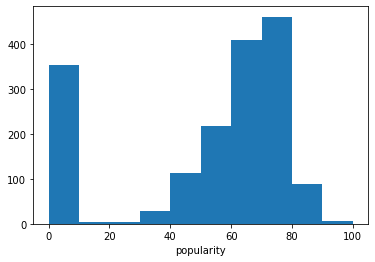

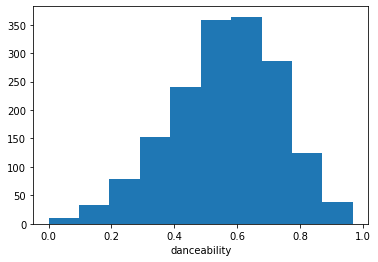

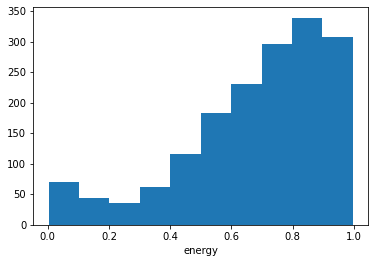

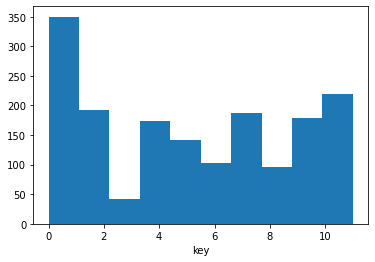

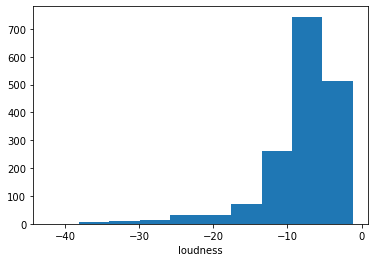

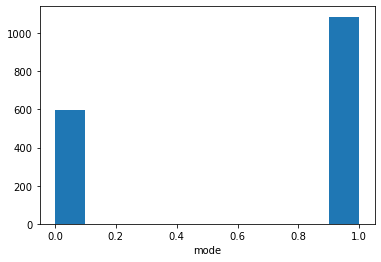

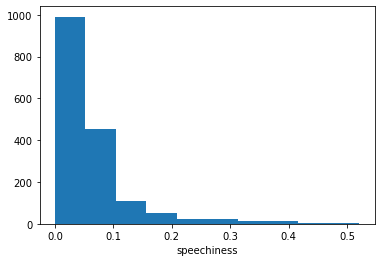

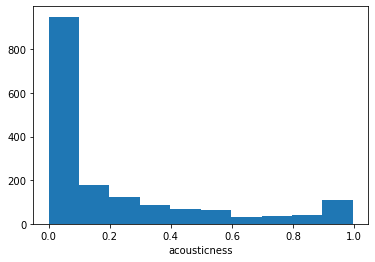

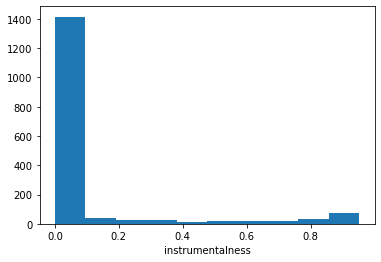

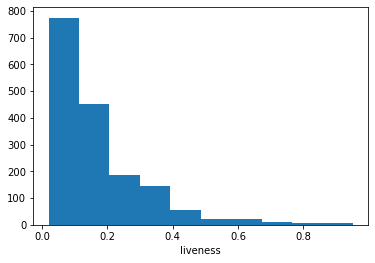

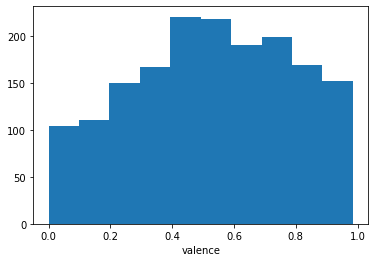

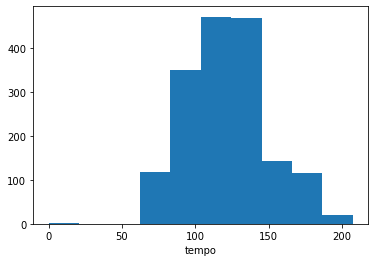

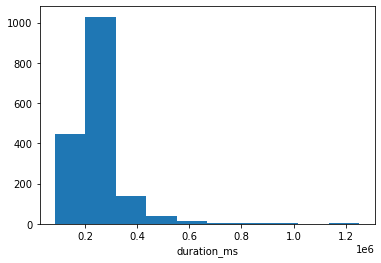

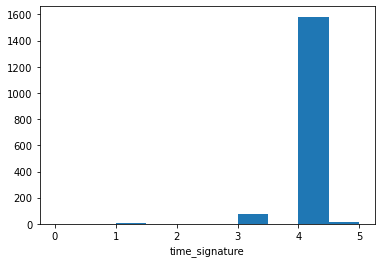

In [482]:
# plt.figure()
# for i, feature in enumerate(audio_feature_cols):
#     plt.subplot(4, 4, i+1)
#     plt.hist(df[feature])
#     plt.title(feature)

# plt.tight_layout()
# plt.show()

def plot(feat):
    plt.figure()
    plt.hist(df[feat])
    plt.xlabel(feat)
    plt.show()

audio_feature_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                          'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

for feat in audio_feature_cols:
    plot(feat)

In [483]:
def clean_df(df, dropped_cols):
    years = []
    for date in df['release_date']:
        years.append(int(date[:4]))

    df['year'] = years
    
    return df.drop(dropped_cols, axis=1)

In [484]:
def get_vector(df_cont, track_id):
    track_df = df_cont.loc[df_cont['id'] == track_id]
    return np.array(track_df.drop(['id'], axis=1)).reshape(-1,)

In [485]:
"""
Recommends a given number of songs that are similar to a given song using minimum Euclidean distance.

:param given_track_id: the ID of the track that should be used for the basis of recommendations
:param num_tracks: the number of similar sogns that should be returned
:returns: a list of songs names that are similar to the given song
:precondition: The given track ID must be contained in the dataframe of song attributes.
"""
def min_euclid_dist_recommender(df, given_track_id, num_tracks, dropped_cols):
    df_cont = clean_df(df, dropped_cols)
    
    given_track_array = get_vector(df_cont, given_track_id)
        
    track_distances = []

    for index in range(len(df_cont)):
        track = df_cont.iloc[index]
        track_array = get_vector(df_cont, track['id'])
        euclid_dist = np.linalg.norm(given_track_array - track_array)
        track_distances.append((track['id'], euclid_dist))

    sorted_tracks = sorted(track_distances, key=lambda x: x[1])
    
    rec_songs = []
    for index in range(num_tracks):
        song_df = df[df['id']==sorted_tracks[index+1][0]]
        rec_song = (song_df.iloc[0]['name'], song_df.iloc[0]['id'])
        rec_songs.append(rec_song)
    
    return rec_songs

In [486]:
def get_ids(rec_songs):
    ids_list = []
    for song in rec_songs:
        ids_list.append(song[1])
    
    return ids_list

In [487]:
def plot_closeness(df, given_song_id, rec_songs_id, dims):
    df_dims = df[dims+['id']]
    
    given_row = df_dims.loc[df_dims['id']==given_song_id]
    given_point = (given_row.iloc[0][dims[0]], given_row.iloc[0][dims[1]])
    
    rec_points = []
    
    for song in rec_songs_id:
        row = df_dims.loc[df_dims['id']==song]
        point = (row.iloc[0][dims[0]], row.iloc[0][dims[1]])
        rec_points.append(point)
    
    rec_x = [point[0] for point in rec_points]
    rec_y = [point[1] for point in rec_points]
    
    df_other = df_dims[~df_dims['id'].isin(rec_songs_id)]
    points = []
    
    for index in range(len(df_other)):
        point = (df_other.iloc[index][0], df_other.iloc[index][1])
        points.append(point)
    
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    plt.figure()
    plt.scatter(x, y)
    plt.scatter(rec_x, rec_y, c='orange')
    plt.scatter(given_point[0], given_point[1], c='red')
    plt.xlabel(dims[0])
    plt.ylabel(dims[1])
    plt.show()

In [488]:
# for reference
continuous_features_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                          'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'popularity']

In [489]:
dropped_cols = ['name', 'artist', 'album', 'key', 'mode', 'time_signature', 'release_date']

In [490]:
df[df['name']=='Shape of You']

,name,album,artist,release_date,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
897,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,84,7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1,-3.183,0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713,4


In [491]:
rec_songs = min_euclid_dist_recommender(df, '7qiZfU4dY1lWllzX7mPBI3', 5, dropped_cols)
print(rec_songs)

[('Sunburn', '5wq8wceQvaFlOZovDtfr0j'), ('Love Yourself', '3hB5DgAiMAQ4DzYbsMq1IT'), ('Awesome to the Max', '1xqmEK0N46Rr0Z5QqVbxzj'), ('It Never Rains in Southern California', '6tunhVGD8C05MZNjSVIsjw'), ('Kryptonite', '6ZOBP3NvffbU4SZcrnt1k6')]


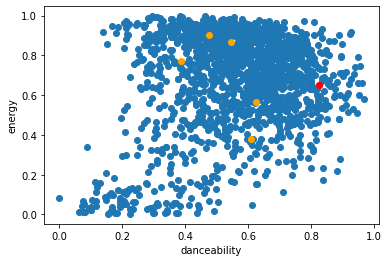

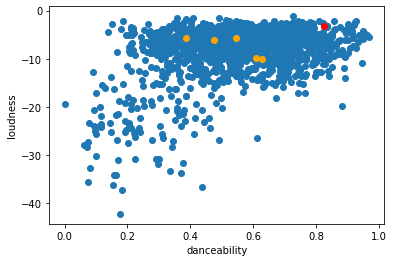

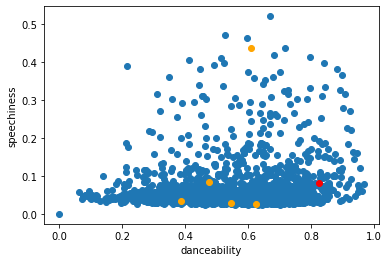

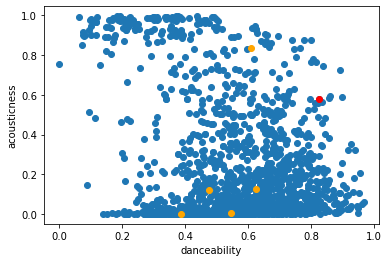

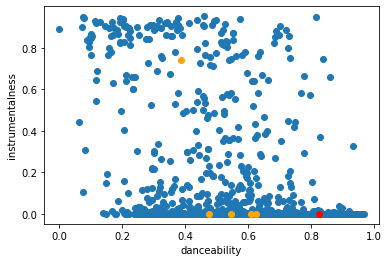

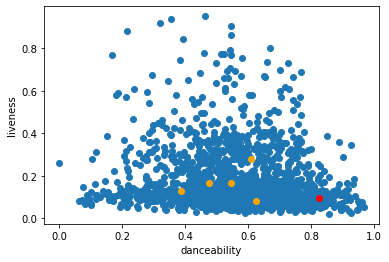

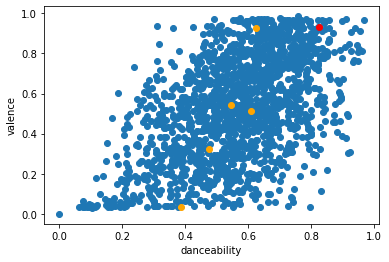

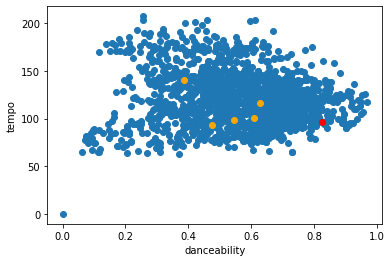

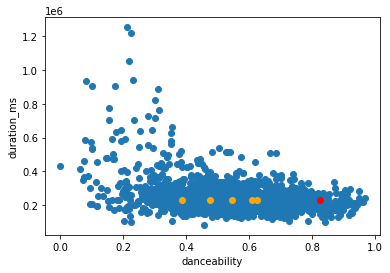

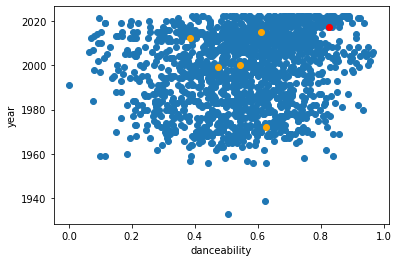

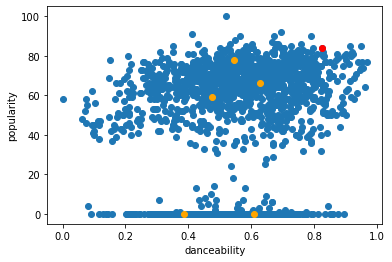

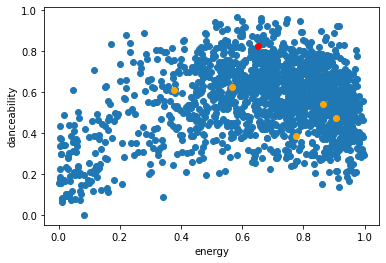

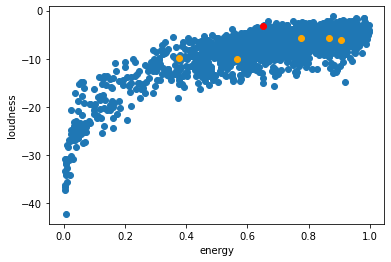

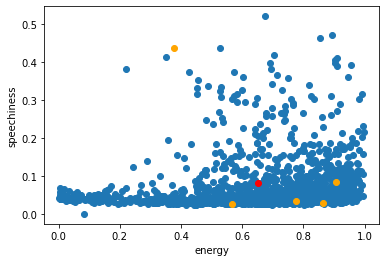

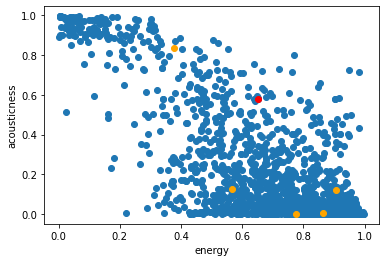

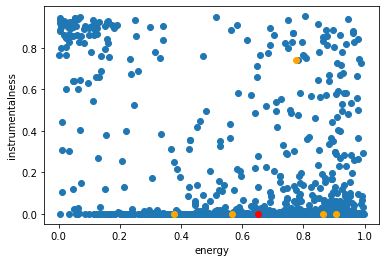

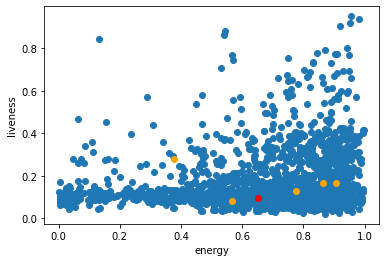

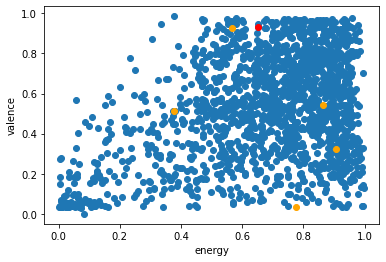

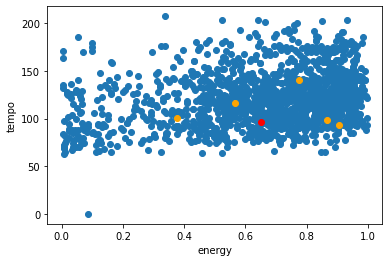

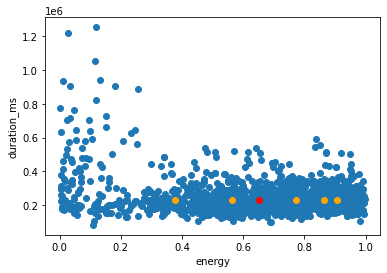

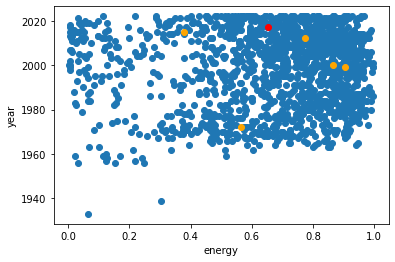

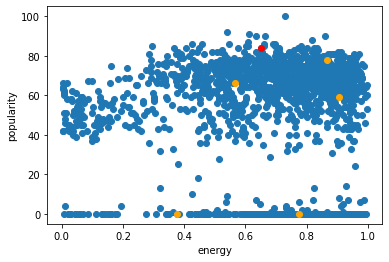

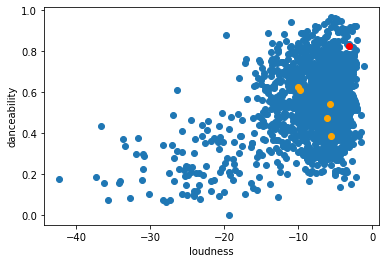

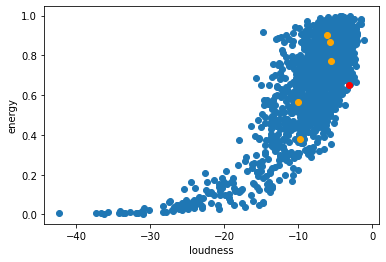

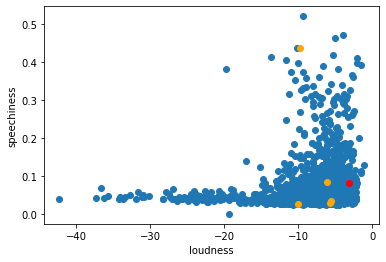

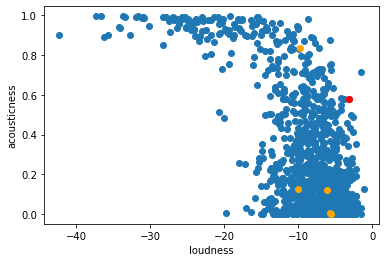

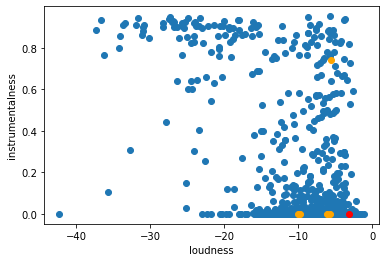

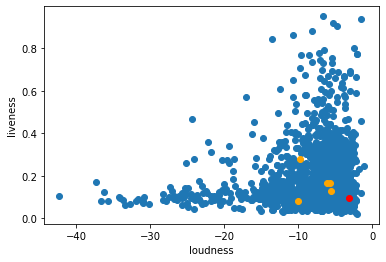

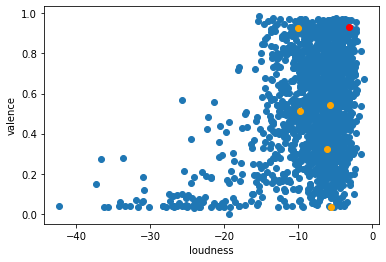

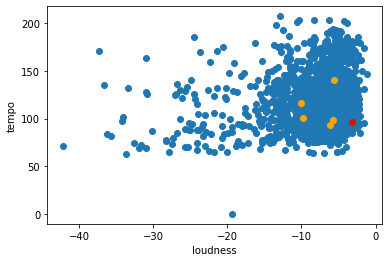

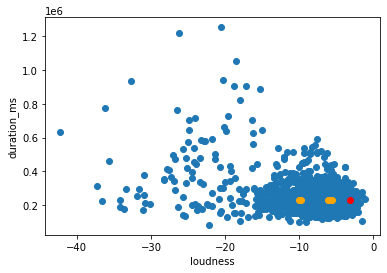

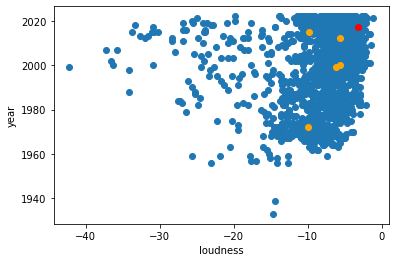

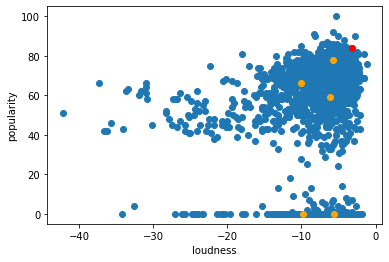

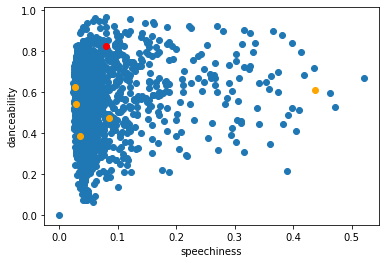

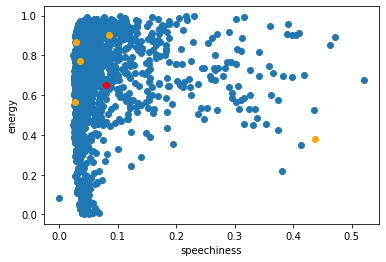

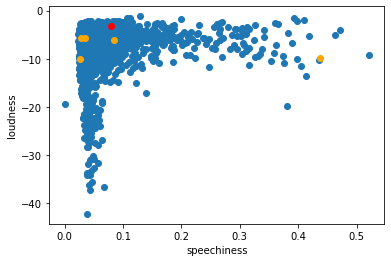

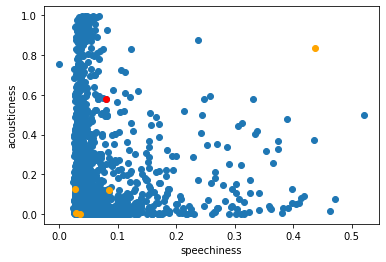

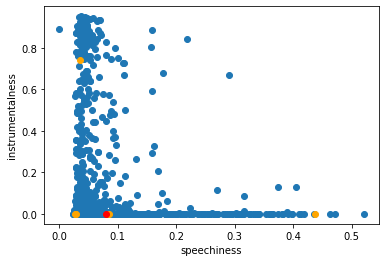

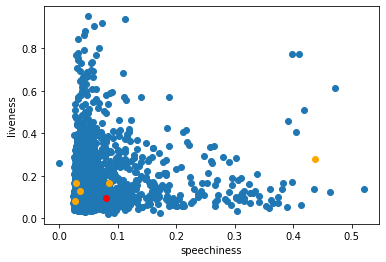

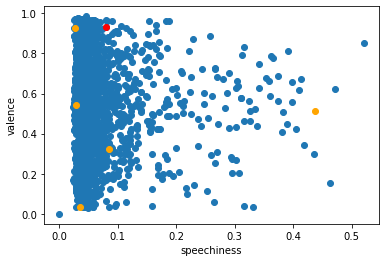

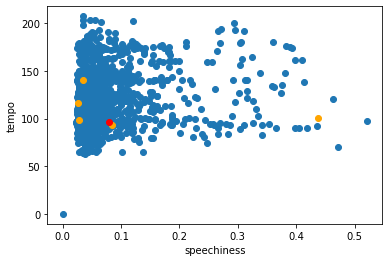

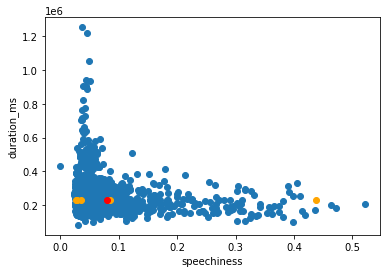

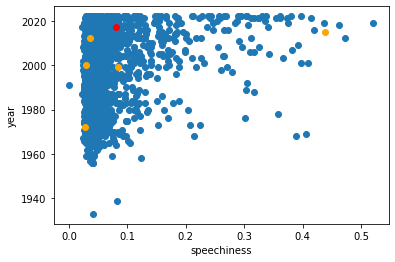

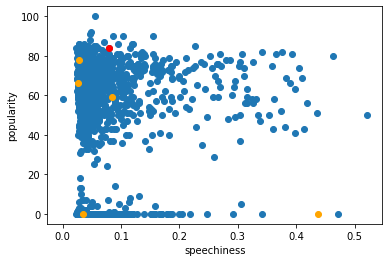

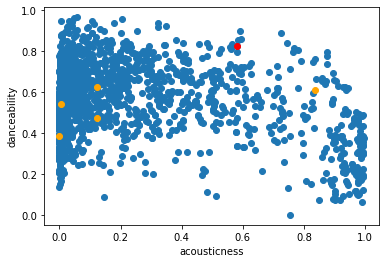

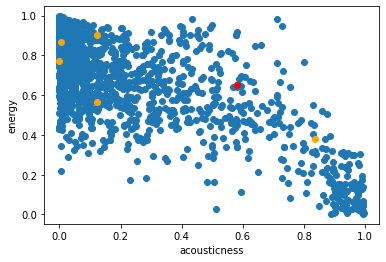

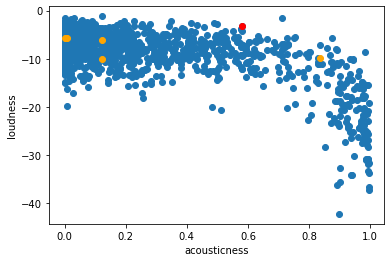

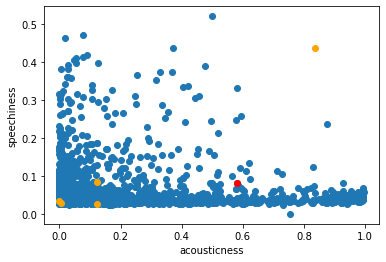

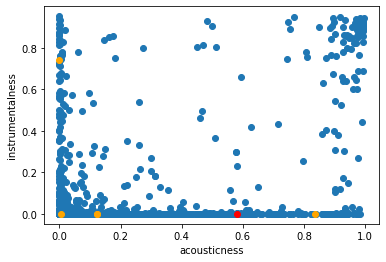

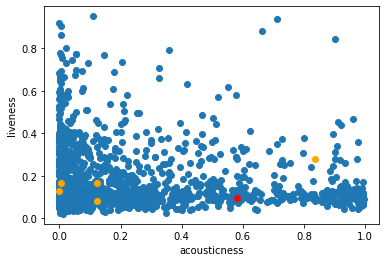

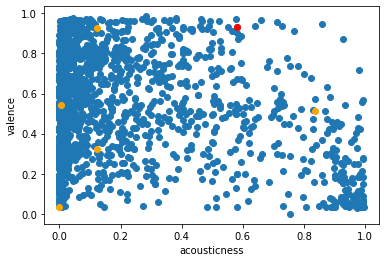

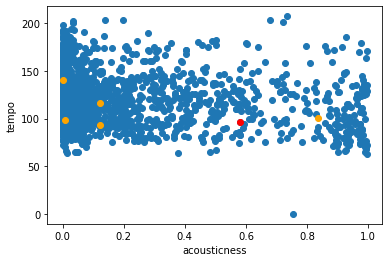

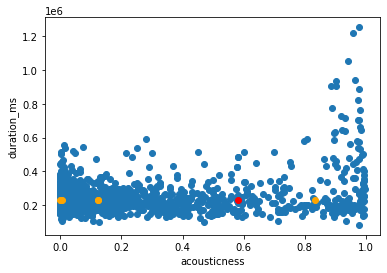

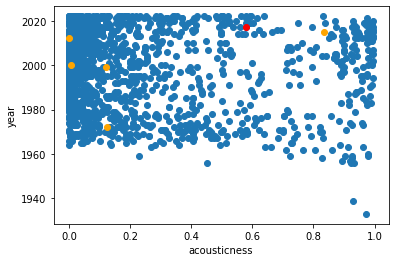

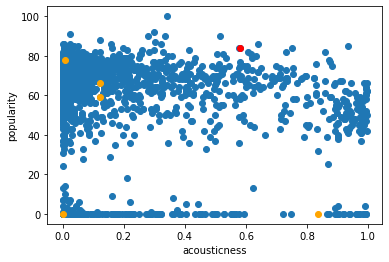

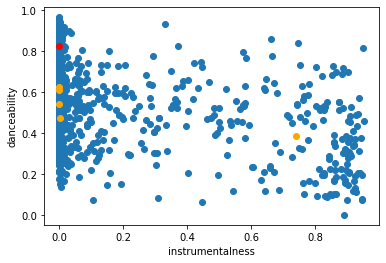

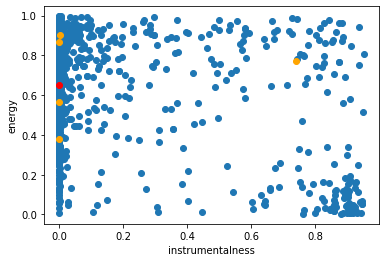

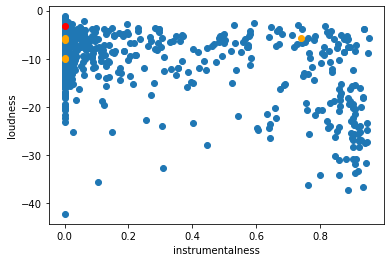

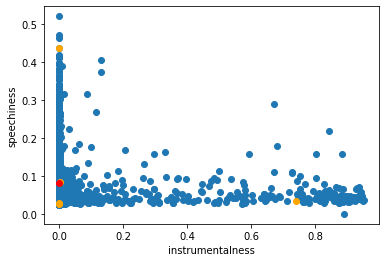

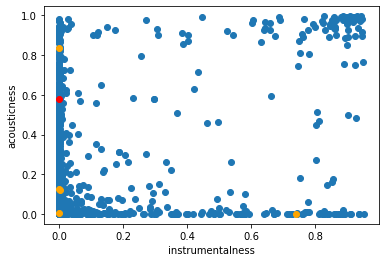

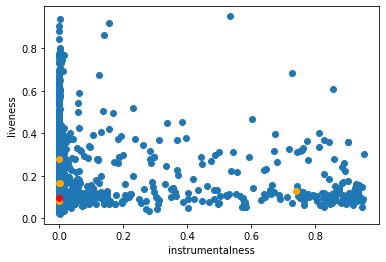

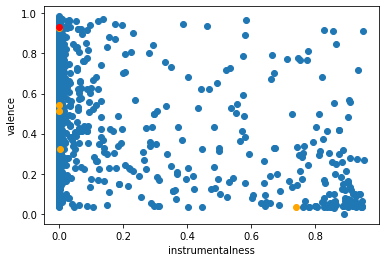

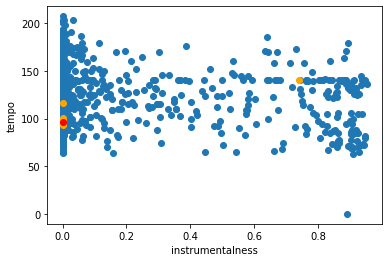

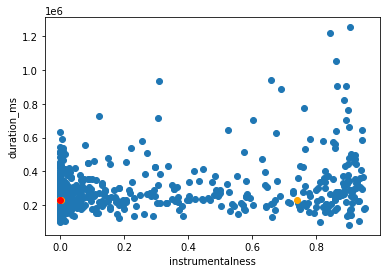

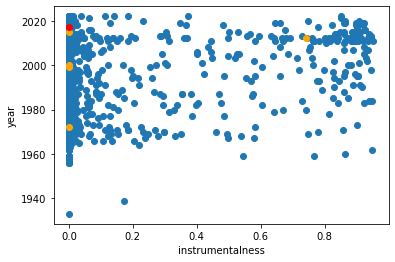

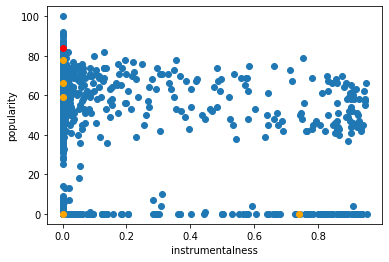

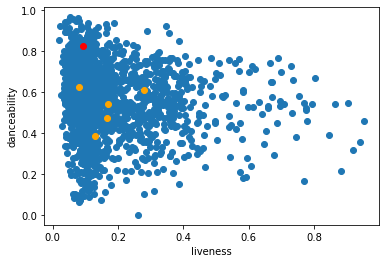

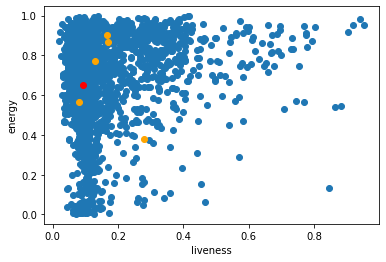

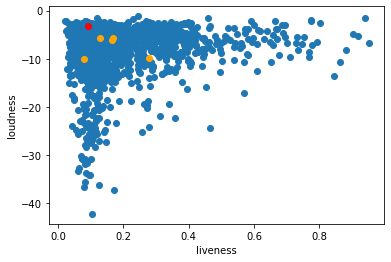

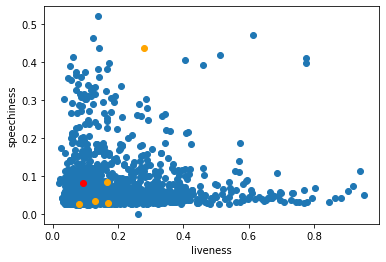

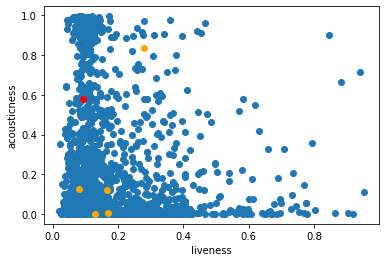

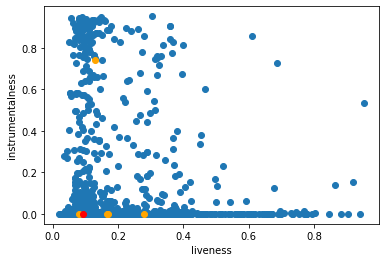

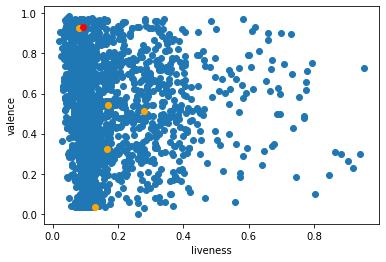

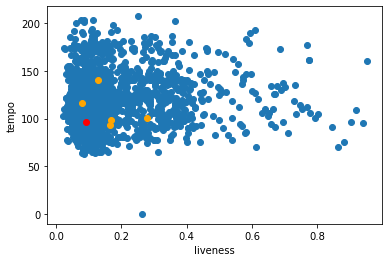

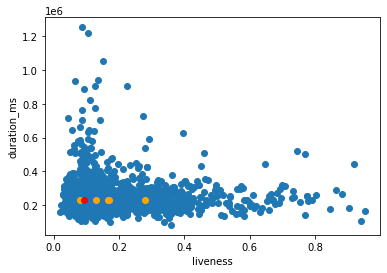

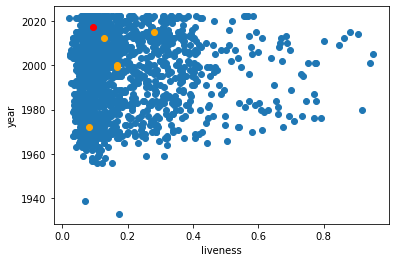

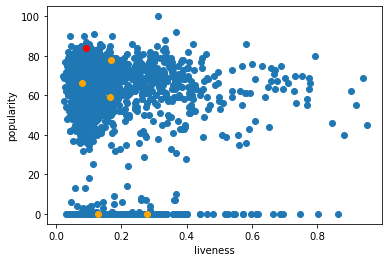

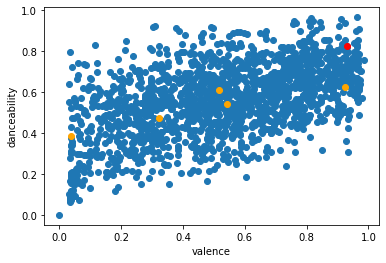

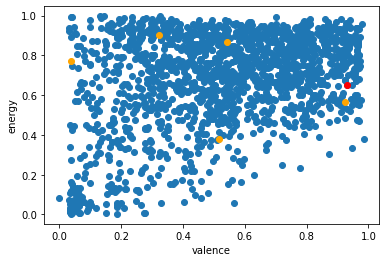

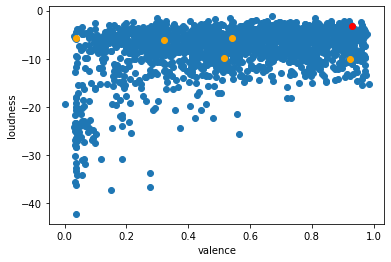

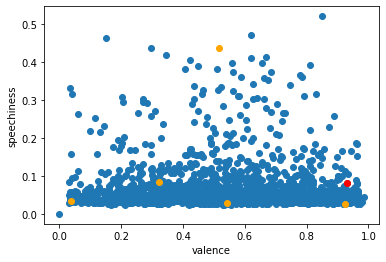

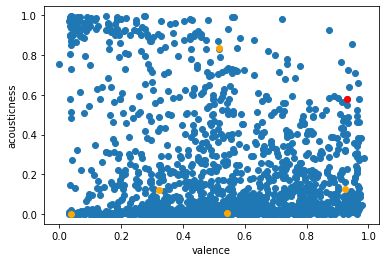

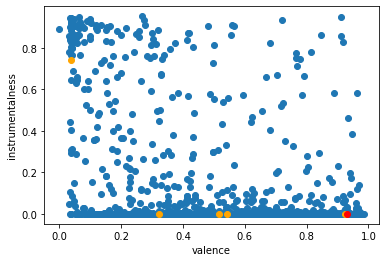

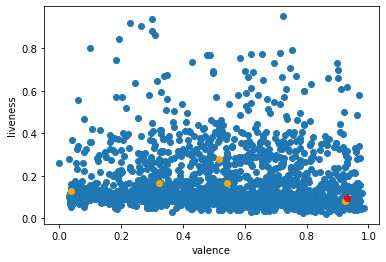

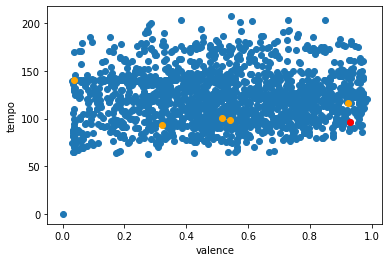

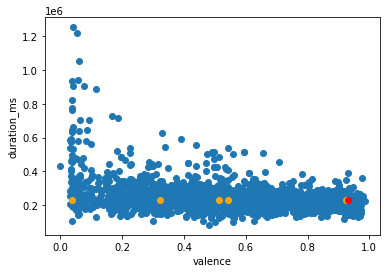

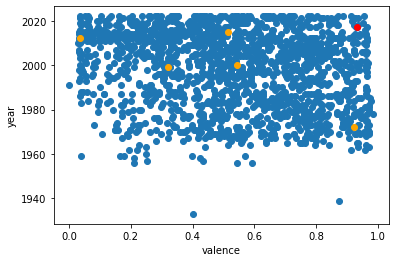

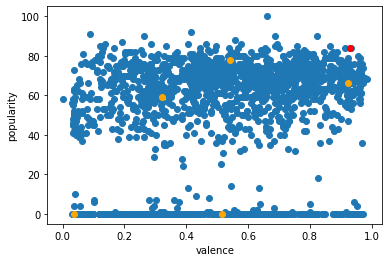

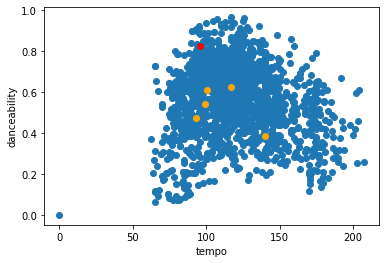

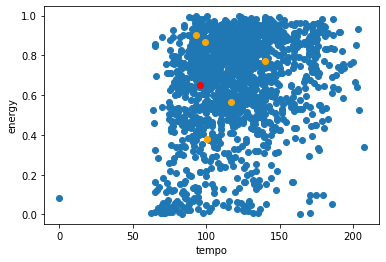

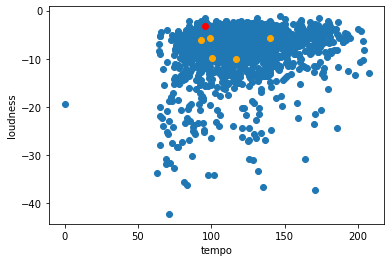

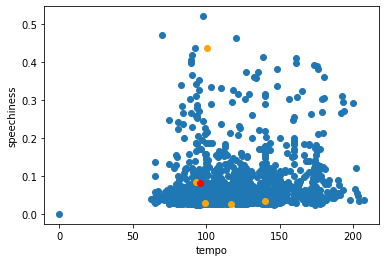

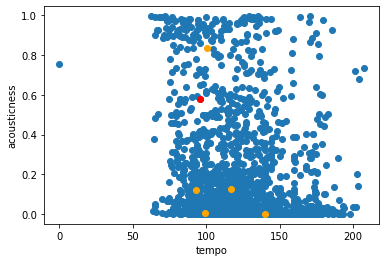

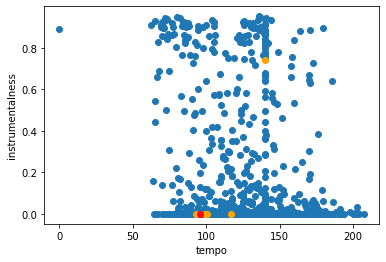

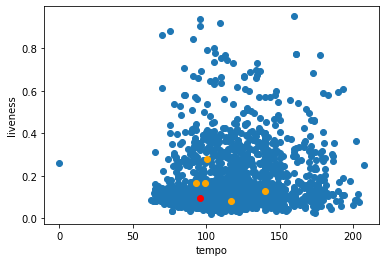

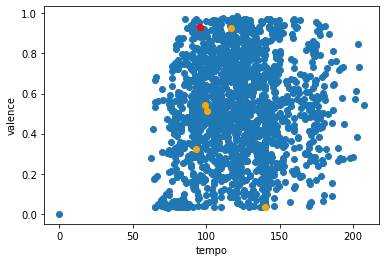

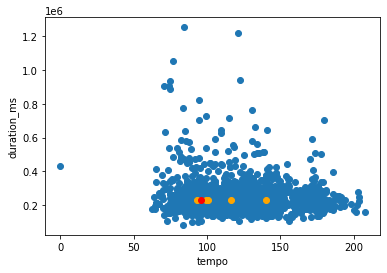

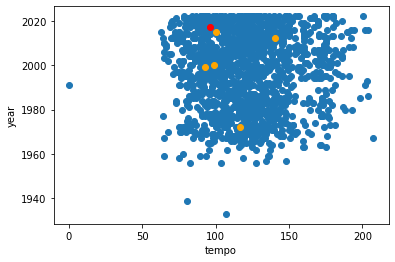

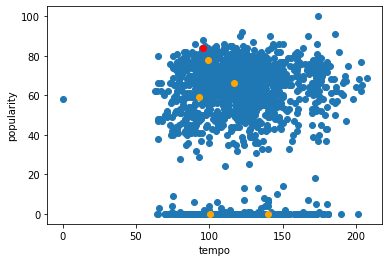

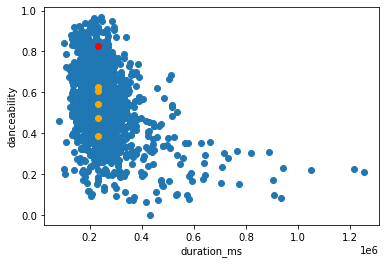

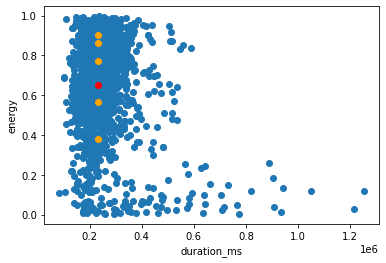

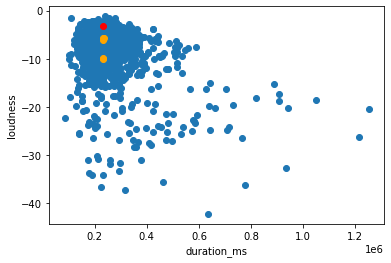

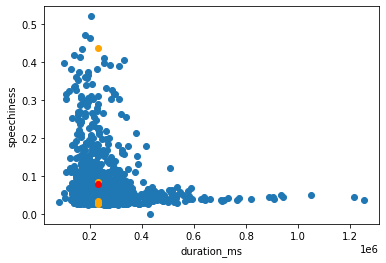

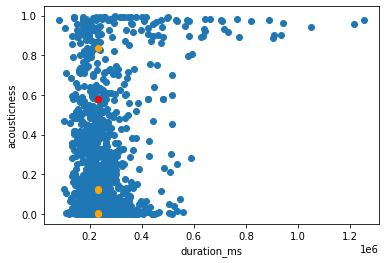

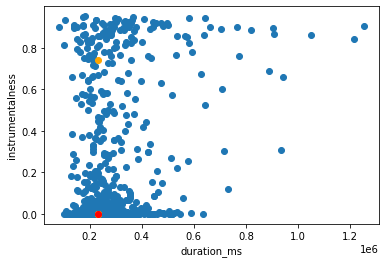

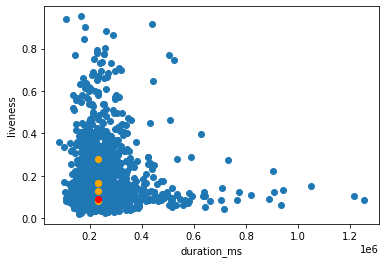

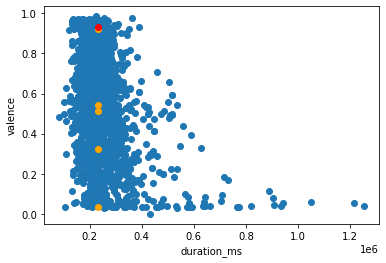

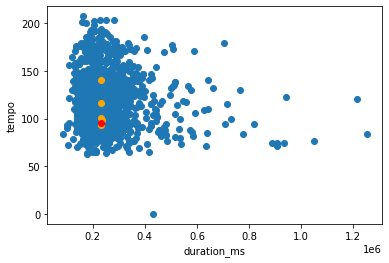

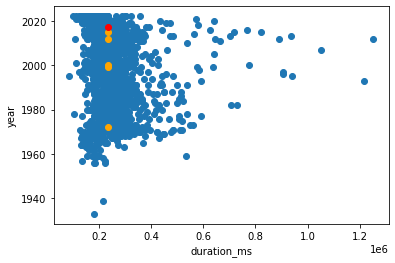

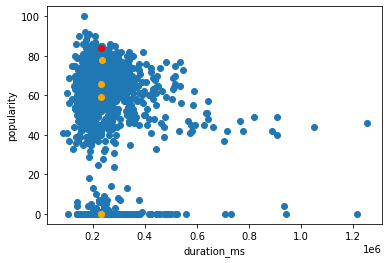

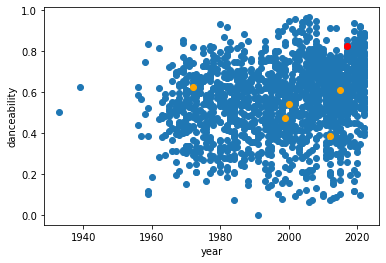

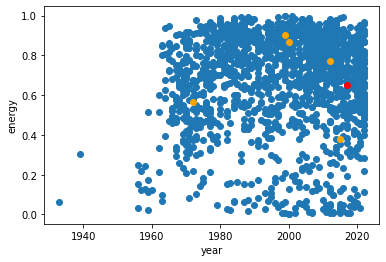

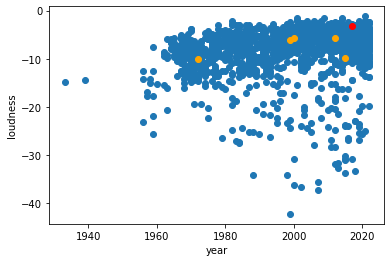

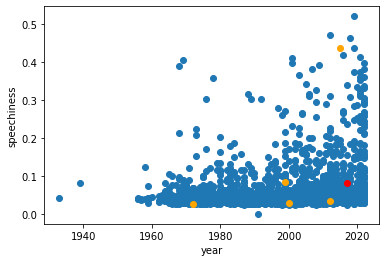

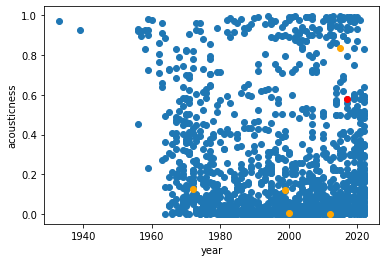

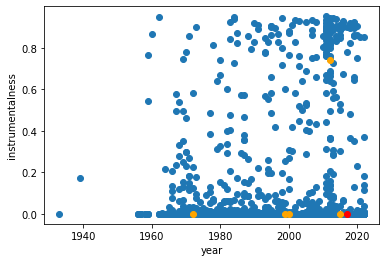

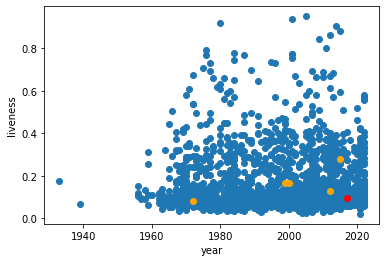

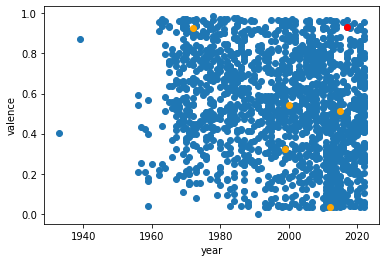

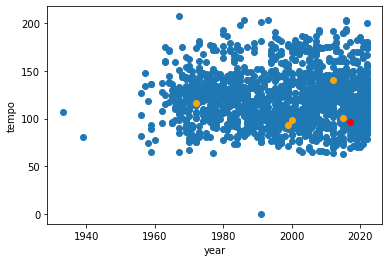

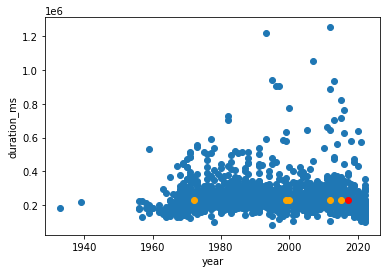

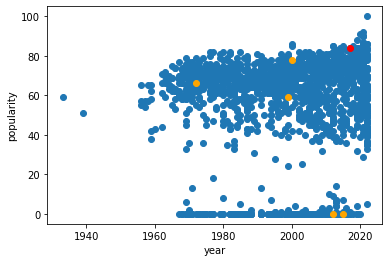

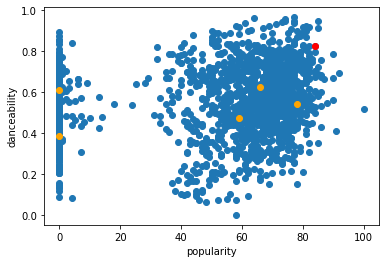

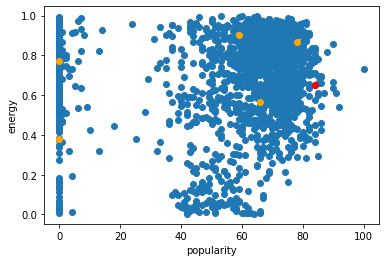

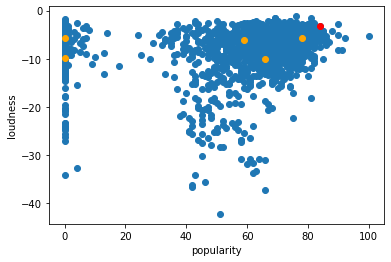

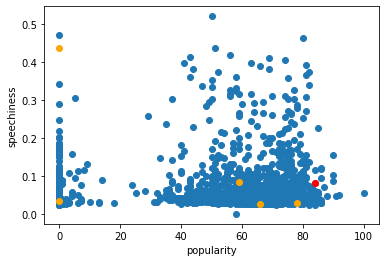

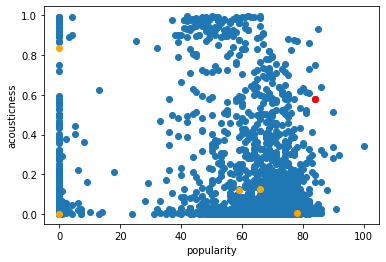

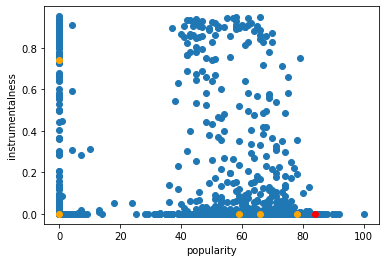

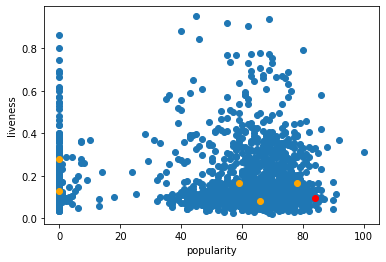

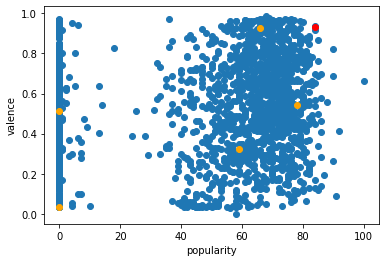

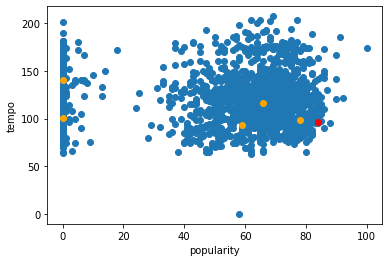

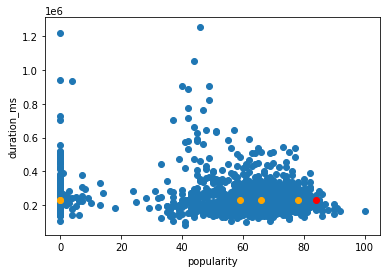

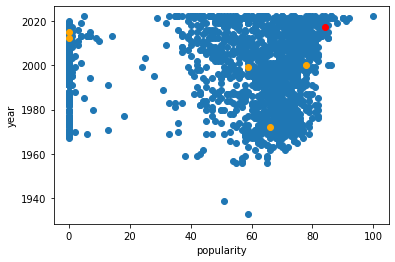

In [492]:
for feat_1 in continuous_features_cols:
    for feat_2 in continuous_features_cols:
        if feat_2 == feat_1:
            continue
        
        plot_closeness(df, '7qiZfU4dY1lWllzX7mPBI3', get_ids(rec_songs), [feat_1, feat_2])